# **Primeros pasos: Leer el archivo CSV de las viviendas**

In [1]:
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster
from conexion import connect_to_postgresql
import osmnx as ox

In [2]:
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    df_completo = pd.read_csv('DatosViviendas1.csv', encoding='latin1', sep = ';')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


C:\Users\USER\AppData\Local\Temp\ipykernel_16768\1645518442.py:2: DtypeWarning: Columns (0,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('DatosViviendas1.csv', encoding='latin1', sep = ';')


In [4]:
df_completo.head()

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
0,1,28/01/2022,"162,446,518.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,SemidetachedHouse,3.00,1.00,1.00,0.00,0.00,"120,000.00",76.00,157.894.736.842.105,"11,100.00",3.647.855,-6.195.769,1.00,31.00,11.00,1.00,"1,103,101.00",Cádiz,Andalucía,San Fernando
1,2,28/01/2022,"162,446,527.00",https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-tecnoc...,Flat,Attic,3.00,1.00,1.00,0.00,0.00,"250,000.00",64.00,3906.25,"11,012.00",3.651.618,-6.272.779,0.00,12.00,11.00,1.00,"1,101,209.00",Cádiz,Andalucía,Cádiz
2,3,28/01/2022,"162,446,511.00",https://www.fotocasa.es/es/comprar/vivienda/mo...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-alquic...,Flat,House_Chalet,3.00,3.00,1.00,1.00,0.00,"399,900.00",337.00,1.186.646.884.273,"18,193.00",3.712.598,-355.286,0.00,134.00,18.00,1.00,"1,813,402.00",Granada,Andalucía,Monachil
3,4,28/01/2022,"162,446,508.00",https://www.fotocasa.es/es/comprar/vivienda/el...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-duran-...,Flat,Flat,1.00,1.00,1.00,0.00,0.00,"95,000.00",78.00,121.794.871.794.872,"4,711.00",3.670.038,-2.788.239,0.00,902.00,4.00,1.00,"490,201.00",Almería,Andalucía,"Ejido, El"
4,5,28/01/2022,"162,446,503.00",https://www.fotocasa.es/es/comprar/vivienda/al...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,CountryHouse,4.00,2.00,1.00,0.00,0.00,"209,000.00",389.00,537.275.064.267.352,"29,530.00",371.995,-4.662.323,0.00,1.00,29.00,1.00,"2,900,101.00",Málaga,Andalucía,Alameda


In [5]:
df_completo.NCA.unique()

array(['Andalucía', nan, 'Aragón', 'Principado de Asturias',
       'Illes Balears', 'Canarias', 'Cantabria', 'Castilla-La Mancha',
       'Castilla y León', 'Cataluña', 'Ceuta', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'La Rioja', 'Comunidad de Madrid',
       'Melilla', 'Comunidad Foral de Navarra', 'País Vasco',
       'Región de Murcia'], dtype=object)

In [6]:
df_CyL = df_completo[df_completo.NCA == 'Castilla y León']

In [7]:
df_CyL.to_csv('raw_data/DatosViviendasCyL.csv', index=False)

In [8]:
df_CyL.columns

Index(['Unnamed: 0', 'Fecha', 'ID', 'URL', 'ID_Cliente', 'URL_Cliente',
       'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'Relacion', 'CodigoPostal',
       'Latitud', 'Longitud', 'Precision', 'CMUN', 'CPRO', 'CCA', 'CUDIS',
       'NPRO', 'NCA', 'NMUN'],
      dtype='object')

In [9]:
df_CyL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27822 entries, 2731 to 953924
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27822 non-null  object 
 1   Fecha            27822 non-null  object 
 2   ID               27822 non-null  float64
 3   URL              27822 non-null  object 
 4   ID_Cliente       27822 non-null  object 
 5   URL_Cliente      27822 non-null  object 
 6   Inmueble         27822 non-null  object 
 7   Caracteristicas  27809 non-null  object 
 8   Habitaciones     26918 non-null  float64
 9   Aseos            27061 non-null  float64
 10  Terraza          27822 non-null  float64
 11  Piscina          27822 non-null  float64
 12  Garaje           27822 non-null  float64
 13  Precio           27389 non-null  float64
 14  Metros           27593 non-null  float64
 15  Relacion         27199 non-null  object 
 16  CodigoPostal     27822 non-null  object 
 17  Latitud      

# Primeras transformaciones de los datos

In [10]:
df_CyL.iloc[0]

Unnamed: 0                                                      2731
Fecha                                                     28/01/2022
ID                                                    162,446,439.00
URL                https://www.fotocasa.es/es/comprar/vivienda/mi...
ID_Cliente                                               9,20276E+12
URL_Cliente        https://www.fotocasa.es/es/comprar/inmuebles/e...
Inmueble                                                        Flat
Caracteristicas                                                 Flat
Habitaciones                                                    2.00
Aseos                                                           1.00
Terraza                                                         1.00
Piscina                                                         0.00
Garaje                                                          0.00
Precio                                                    115,000.00
Metros                            

# Mapa de distribución de las ciudades

In [11]:
def transformar_coordenadas(num):
    num = str(num).replace('.', '')
    # Rellenar con ceros a la derecha hasta tener 7 dígitos
    num_str = num.ljust(7, '0')
    # Insertar el punto después de los dos primeros dígitos
    num_str = num_str[:2] + '.' + num_str[2:]
    return float(num_str)

In [12]:
# Crear una copia del DataFrame para evitar SettingWithCopyWarning
df_CyL = df_CyL.copy()

# Aplicar la transformación a cada columna utilizando .loc
df_CyL.loc[:, 'Latitud'] = df_CyL['Latitud'].apply(transformar_coordenadas)
df_CyL.loc[:, 'Longitud'] = df_CyL['Longitud'].apply(transformar_coordenadas)

In [13]:
# Centro del mapa
centro_lat = df_CyL['Latitud'].mean()
centro_lon = df_CyL['Longitud'].mean()

# Crear el mapa
mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=7)

# Preparar los datos
locations = df_CyL[['Latitud', 'Longitud']].values.tolist()

# Añadir los puntos utilizando FastMarkerCluster
FastMarkerCluster(data=locations).add_to(mapa)

# Guardar el mapa
mapa.save('mapas/mapa_interactivo_fast.html')

In [14]:
# Obtener los límites administrativos de Castilla y León desde OpenStreetMap
gdf_cyl = ox.geocode_to_gdf('Castilla y León, España', which_result=1)

# Reproyectar la geometría a un CRS proyectado (por ejemplo, ETRS89 / UTM zona 30N)
gdf_cyl_proj = gdf_cyl.to_crs(epsg=25830)

# Calcular el centroide en el CRS proyectado
centroide_proj = gdf_cyl_proj.geometry.centroid

# Reproyectar el centroide de vuelta al CRS geográfico WGS84
centroide_wgs84 = centroide_proj.to_crs(epsg=4326)

# Obtener las coordenadas del centroide
centro_lat = centroide_wgs84.y.values[0]
centro_lon = centroide_wgs84.x.values[0]

# Mostrar las coordenadas del centroide (opcional)
print(f"Centro del mapa - Latitud: {centro_lat}, Longitud: {centro_lon}")

# Crear el mapa centrado en el centroide de Castilla y León
mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=7)

# Añadir los límites al mapa
folium.GeoJson(
    gdf_cyl,
    name='Castilla y León',
    style_function=lambda feature: {
        'color': 'green',
        'weight': 2,
        'fillOpacity': 0.1,
    }
).add_to(mapa)

# Añadir los marcadores utilizando FastMarkerCluster
locations = df_CyL[['Latitud', 'Longitud']].values.tolist()
FastMarkerCluster(data=locations).add_to(mapa)

# Añadir control de capas
folium.LayerControl().add_to(mapa)

# Guardar el mapa
mapa.save('mapas/mapa_interactivo_castilla_leon.html')



Centro del mapa - Latitud: 41.75223573733274, Longitud: -4.785614805789339


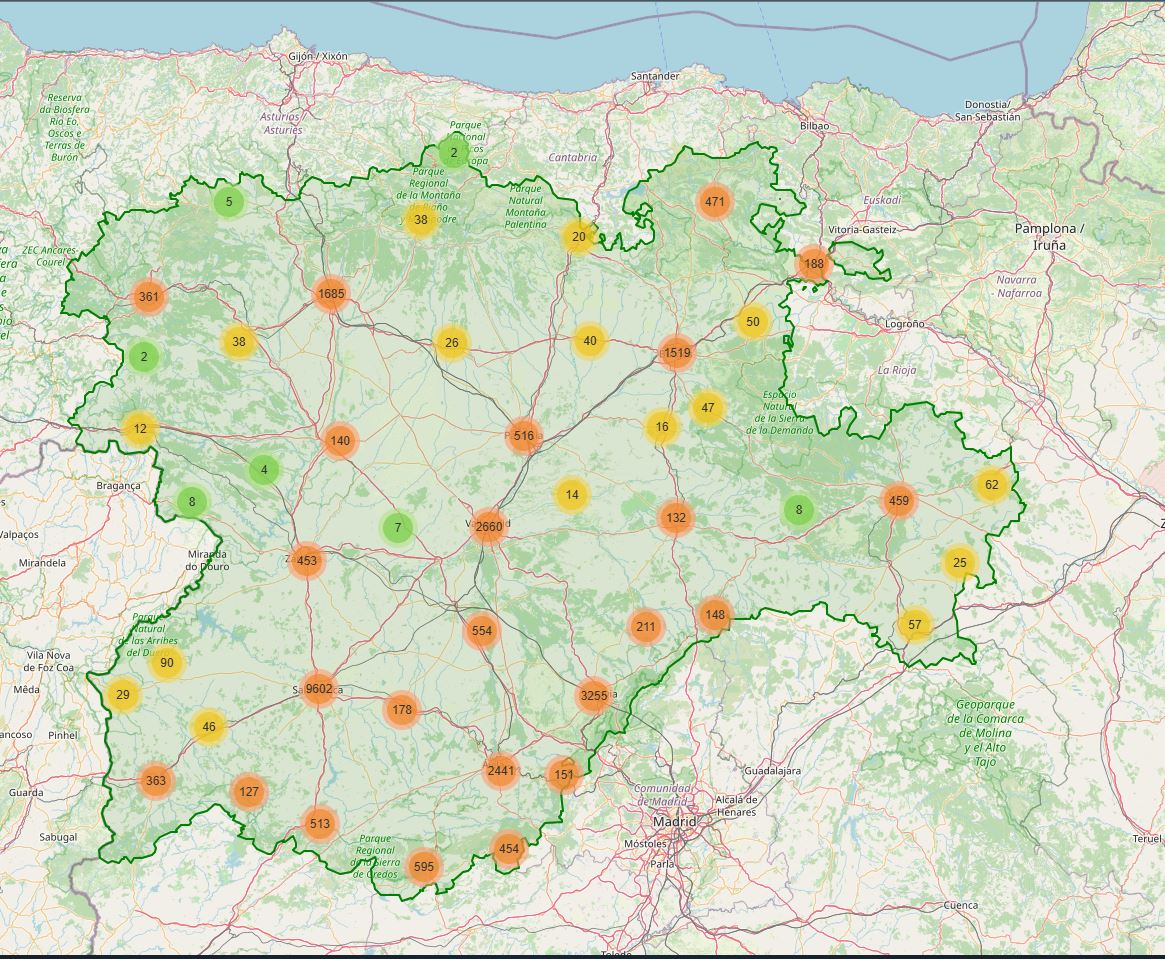

De esta manera nos aseguramos que todas las viviendas están en Castilla y León y podemos hacer el estudio de esta provincia.

In [15]:
df_CyL.head()

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
2731,2731,28/01/2022,"162,446,439.00",https://www.fotocasa.es/es/comprar/vivienda/mi...,"9,20276E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,Flat,2.00,1.00,1.00,0.00,0.00,"115,000.00",70.00,164.285.714.285.714,"9,200.00",42.69,-2.93,1.00,219.00,9.00,7.00,"921,903.00",Burgos,Castilla y León,Miranda de Ebro
2732,2732,28/01/2022,"162,446,403.00",https://www.fotocasa.es/es/comprar/vivienda/me...,"9,20277E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,SemidetachedHouse,4.00,2.00,0.00,0.00,0.00,"27,000.00",90.00,300,"9,100.00",42.40,-4.25,1.00,211.00,9.00,7.00,"921,101.00",Burgos,Castilla y León,Melgar de Fernamental
2733,2733,28/01/2022,"162,446,393.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sotoca...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,"79,900.00",72.00,110.972.222.222.222,"47,010.00",41.66,-4.72,0.00,186.00,47.00,7.00,"4,718,608.00",Valladolid,Castilla y León,Valladolid
2734,2734,28/01/2022,"162,446,392.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sotoca...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"108,000.00",76.00,142.105.263.157.895,"47,009.00",41.66,-4.73,0.00,186.00,47.00,7.00,"4,718,610.00",Valladolid,Castilla y León,Valladolid
2735,2735,28/01/2022,"162,446,351.00",https://www.fotocasa.es/es/comprar/vivienda/av...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-grupo-...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"55,500.00",83.00,668.674.698.795.181,"5,003.00",40.65,-4.68,0.00,19.00,5.00,7.00,"501,905.00",Ávila,Castilla y León,Ávila


# Preparación de las tablas de BBDD

In [16]:
df_CyL[df_CyL['CMUN'] == 1]

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
15518,2513183,26/01/2022,"161,769,362.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-partic...,Flat,House_Chalet,4.00,2.00,1.00,0.00,0.00,"82,000.00",450.00,182.222.222.222.222,"24,001.00",41.81,-2.79,1.00,1.00,42.00,7.00,"4,200,101.00",Soria,Castilla y León,Abejar
104819,346270,26/12/2021,"162,195,568.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-partic...,Flat,House_Chalet,5.00,3.00,1.00,0.00,0.00,"360,000.00",345.00,104.347.826.086.957,40141,40.92,-4.27,1.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades
216550,2233136,08/11/2021,"161,769,362.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-partic...,Flat,House_Chalet,4.00,2.00,1.00,0.00,0.00,"88,000.00",450.00,195.555.555.555.556,24001,41.81,-2.79,1.00,1.00,42.00,7.00,"4,200,101.00",Soria,Castilla y León,Abejar
483689,90575,08/09/2021,"160,999,846.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-enriqu...,Flat,House_Chalet,2.00,1.00,0.00,0.00,0.00,NaN,222.00,NaN,40141,40.91,-4.27,1.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades
483705,90591,08/09/2021,"160,314,496.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-altami...,Flat,SemidetachedHouse,3.00,2.00,1.00,0.00,0.00,"93,000.00",156.00,596.153.846.153.846,40141,40.91,-4.27,0.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades
483767,90653,08/09/2021,"158,017,545.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-haya-r...,Flat,Flat,3.00,2.00,0.00,0.00,0.00,"72,400.00",147.00,492.517.006.802.721,40141,40.92,-4.27,0.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades
483829,90715,08/09/2021,"160,755,754.00",https://www.fotocasa.es/es/comprar/vivienda/ad...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-juan-j...,Flat,GroundFloorWithGarden,4.00,2.00,0.00,0.00,0.00,"59,500.00",159.00,374.213.836.477.987,5296,40.94,-4.60,1.00,1.00,5.00,7.00,"500,101.00",Ávila,Castilla y León,Adanero
483895,90781,08/09/2021,"159,760,368.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-altami...,Flat,SemidetachedHouse,4.00,3.00,0.00,0.00,0.00,"89,000.00",156.00,570.512.820.512.821,40141,40.91,-4.27,0.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades
483942,90828,08/09/2021,"155,746,884.00",https://www.fotocasa.es/es/comprar/vivienda/ad...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-rual-i...,Flat,House_Chalet,6.00,3.00,0.00,0.00,0.00,"26,000.00",377.00,689.655.172.413.793,5296,40.94,-4.60,0.00,1.00,5.00,7.00,"500,101.00",Ávila,Castilla y León,Adanero
483956,90842,08/09/2021,"156,944,211.00",https://www.fotocasa.es/es/comprar/vivienda/ab...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-ambito...,Flat,SemidetachedHouse,4.00,2.00,0.00,0.00,0.00,"140,000.00",222.00,630.630.630.630.631,40141,40.91,-4.27,0.00,1.00,40.00,7.00,"4,000,101.00",Segovia,Castilla y León,Abades


In [17]:
df_alquiler = df_CyL[df_CyL['URL'].str.contains("alquiler", na=False)]
df_venta = df_CyL[df_CyL['URL'].str.contains("comprar", na=False)]

In [18]:
df_venta.head()

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
2731,2731,28/01/2022,"162,446,439.00",https://www.fotocasa.es/es/comprar/vivienda/mi...,"9,20276E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,Flat,2.00,1.00,1.00,0.00,0.00,"115,000.00",70.00,164.285.714.285.714,"9,200.00",42.69,-2.93,1.00,219.00,9.00,7.00,"921,903.00",Burgos,Castilla y León,Miranda de Ebro
2732,2732,28/01/2022,"162,446,403.00",https://www.fotocasa.es/es/comprar/vivienda/me...,"9,20277E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,SemidetachedHouse,4.00,2.00,0.00,0.00,0.00,"27,000.00",90.00,300,"9,100.00",42.40,-4.25,1.00,211.00,9.00,7.00,"921,101.00",Burgos,Castilla y León,Melgar de Fernamental
2733,2733,28/01/2022,"162,446,393.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sotoca...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,"79,900.00",72.00,110.972.222.222.222,"47,010.00",41.66,-4.72,0.00,186.00,47.00,7.00,"4,718,608.00",Valladolid,Castilla y León,Valladolid
2734,2734,28/01/2022,"162,446,392.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sotoca...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"108,000.00",76.00,142.105.263.157.895,"47,009.00",41.66,-4.73,0.00,186.00,47.00,7.00,"4,718,610.00",Valladolid,Castilla y León,Valladolid
2735,2735,28/01/2022,"162,446,351.00",https://www.fotocasa.es/es/comprar/vivienda/av...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-grupo-...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"55,500.00",83.00,668.674.698.795.181,"5,003.00",40.65,-4.68,0.00,19.00,5.00,7.00,"501,905.00",Ávila,Castilla y León,Ávila


In [19]:
df_venta.loc[:, 'Latitud'] = df_venta['Latitud'].astype(float)
df_venta.loc[:, 'Longitud'] = df_venta['Longitud'].astype(float)
df_venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26042 entries, 2731 to 672582
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       26042 non-null  object 
 1   Fecha            26042 non-null  object 
 2   ID               26042 non-null  float64
 3   URL              26042 non-null  object 
 4   ID_Cliente       26042 non-null  object 
 5   URL_Cliente      26042 non-null  object 
 6   Inmueble         26042 non-null  object 
 7   Caracteristicas  26029 non-null  object 
 8   Habitaciones     25182 non-null  float64
 9   Aseos            25289 non-null  float64
 10  Terraza          26042 non-null  float64
 11  Piscina          26042 non-null  float64
 12  Garaje           26042 non-null  float64
 13  Precio           25632 non-null  float64
 14  Metros           25832 non-null  float64
 15  Relacion         25457 non-null  object 
 16  CodigoPostal     26042 non-null  object 
 17  Latitud      

In [20]:
df_alquiler.head()

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
911698,1910033,09/09/2021,"156,879,656.00",https://www.fotocasa.es/es/alquiler/vivienda/s...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-pima-i...,Flat,Apartment,1.00,1.00,0.00,0.00,0.00,750.00,49.00,153.061.224.489.796,"37,002.00",40.97,-5.66,0.00,274.00,37.00,7.00,"3,727,401.00",Salamanca,Castilla y León,Salamanca
911702,2310042,09/09/2021,"147,382,533.00",https://www.fotocasa.es/es/alquiler/vivienda/s...,"5,0018E+11",https://www.fotocasa.es/es/inmobiliaria-dj-san...,Flat,Attic,1.00,1.00,1.00,0.00,0.00,500.00,50.00,10,"37,006.00",40.98,-5.67,0.00,274.00,37.00,7.00,"3,727,404.00",Salamanca,Castilla y León,Salamanca
911709,3039611,09/09/2021,"161,206,148.00",https://www.fotocasa.es/es/alquiler/vivienda/s...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,495.00,79.00,626.582.278.481.013,"37,006.00",40.97,-5.67,0.00,274.00,37.00,7.00,"3,727,405.00",Salamanca,Castilla y León,Salamanca
911711,341043,09/09/2021,"161,205,533.00",https://www.fotocasa.es/es/alquiler/vivienda/s...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-outlet...,Flat,Flat,3.00,2.00,0.00,0.00,0.00,600.00,90.00,666.666.666.666.667,"37,006.00",40.98,-5.68,0.00,274.00,37.00,7.00,"3,727,404.00",Salamanca,Castilla y León,Salamanca
911714,397513,09/09/2021,"161,204,421.00",https://www.fotocasa.es/es/alquiler/vivienda/s...,"9,20277E+12",https://www.fotocasa.es/es/alquiler/inmuebles/...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,690.00,85.00,811.764.705.882.353,"37,002.00",40.97,-5.66,1.00,274.00,37.00,7.00,"3,727,401.00",Salamanca,Castilla y León,Salamanca


In [21]:
df_alquiler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780 entries, 911698 to 953924
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1780 non-null   object 
 1   Fecha            1780 non-null   object 
 2   ID               1780 non-null   float64
 3   URL              1780 non-null   object 
 4   ID_Cliente       1780 non-null   object 
 5   URL_Cliente      1780 non-null   object 
 6   Inmueble         1780 non-null   object 
 7   Caracteristicas  1780 non-null   object 
 8   Habitaciones     1736 non-null   float64
 9   Aseos            1772 non-null   float64
 10  Terraza          1780 non-null   float64
 11  Piscina          1780 non-null   float64
 12  Garaje           1780 non-null   float64
 13  Precio           1757 non-null   float64
 14  Metros           1761 non-null   float64
 15  Relacion         1742 non-null   object 
 16  CodigoPostal     1780 non-null   object 
 17  Latitud     

## Eliminación de duplicados

In [22]:
duplicados = df_venta[df_venta['ID'].duplicated(keep=False)]
duplicados = duplicados.sort_values(by=['ID'])
duplicados


,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
344422,9710,08/09/2021,"139,072,030.00",https://www.fotocasa.es/es/comprar/vivienda/ci...,"9,20275E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,CountryHouse,4.00,2.00,0.00,0.00,0.00,"35,000.00",300.00,116.666.666.666.667,42126,41.41,-2.00,0.00,63.00,42.00,7.00,"4,206,301.00",Soria,Castilla y León,Cihuela
672582,1726912,05/09/2021,"139,072,030.00",https://www.fotocasa.es/es/comprar/vivienda/ci...,"9,20275E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,CountryHouse,4.00,2.00,0.00,0.00,0.00,"35,000.00",300.00,116.666.666.666.667,"42,126.00",41.41,-2.00,0.00,63.00,42.00,7.00,"4,206,301.00",Soria,Castilla y León,Cihuela
450505,571691,08/09/2021,"141,181,838.00",https://www.fotocasa.es/es/comprar/vivienda/na...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sergio...,Flat,Duplex,3.00,3.00,1.00,0.00,1.00,"175,000.00",120.00,145.833.333.333.333,"5,100.00",40.41,-4.70,0.00,163.00,5.00,7.00,"516,301.00",Ávila,Castilla y León,Navaluenga
98787,1512178,28/12/2021,"141,181,838.00",https://www.fotocasa.es/es/comprar/vivienda/na...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sergio...,Flat,Duplex,3.00,3.00,1.00,0.00,1.00,"185,000.00",120.00,154.166.666.666.667,5100,40.41,-4.70,0.00,163.00,5.00,7.00,"516,301.00",Ávila,Castilla y León,Navaluenga
220459,625155,07/11/2021,"144,599,690.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-juan-c...,Flat,Flat,2.00,1.00,0.00,0.00,1.00,"82,900.00",82.00,10.109.756.097.561,24010,42.60,-5.61,1.00,142.00,24.00,7.00,"2,414,202.00",León,Castilla y León,San Andrés del Rabanedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,2937,28/01/2022,"162,436,051.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,Flat,1.00,1.00,0.00,0.00,0.00,"120,000.00",53.00,226.415.094.339.623,"37,008.00",40.96,-5.66,0.00,274.00,37.00,7.00,"3,727,403.00",Salamanca,Castilla y León,Salamanca
2934,2934,28/01/2022,"162,437,671.00",https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-hogar-...,Flat,Flat,3.00,2.00,1.00,0.00,0.00,"181,000.00",130.00,139.230.769.230.769,"37,188.00",40.94,-5.65,0.00,85.00,37.00,7.00,"3,708,501.00",Salamanca,Castilla y León,Carbajosa de la Sagrada
9494,2762165,27/01/2022,"162,437,671.00",https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-hogar-...,Flat,Flat,3.00,2.00,1.00,0.00,0.00,"181,000.00",130.00,139.230.769.230.769,"37,188.00",40.94,-5.65,0.00,85.00,37.00,7.00,"3,708,501.00",Salamanca,Castilla y León,Carbajosa de la Sagrada
9493,2761164,27/01/2022,"162,437,787.00",https://www.fotocasa.es/es/comprar/vivienda/fu...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-jorge/...,Flat,SemidetachedHouse,3.00,2.00,0.00,0.00,0.00,"33,000.00",120.00,275,"40,330.00",41.30,-3.93,1.00,88.00,40.00,7.00,"4,008,801.00",Segovia,Castilla y León,Fuenterrebollo


In [23]:
df_venta.loc[:, 'CodigoPostal'] = df_venta['CodigoPostal'].astype(str)
df_venta.loc[:, 'CodigoPostal'] = df_venta['CodigoPostal'].str.replace(',', '').str.replace('.00', '', regex=False).str.replace('.0', '', regex=False).str.zfill(5)
df_venta['CodigoPostal'].head()


2731    09200
2732    09100
2733    47010
2734    47009
2735    05003
Name: CodigoPostal, dtype: object

In [24]:
df_venta_new = df_venta.drop(columns='Unnamed: 0', axis=1).copy()
duplicados = df_venta_new[df_venta_new['ID'].duplicated(keep=False)]
duplicados = duplicados.sort_values(by=['ID'])
duplicados

,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
344422,08/09/2021,"139,072,030.00",https://www.fotocasa.es/es/comprar/vivienda/ci...,"9,20275E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,CountryHouse,4.00,2.00,0.00,0.00,0.00,"35,000.00",300.00,116.666.666.666.667,42126,41.41,-2.00,0.00,63.00,42.00,7.00,"4,206,301.00",Soria,Castilla y León,Cihuela
672582,05/09/2021,"139,072,030.00",https://www.fotocasa.es/es/comprar/vivienda/ci...,"9,20275E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,CountryHouse,4.00,2.00,0.00,0.00,0.00,"35,000.00",300.00,116.666.666.666.667,42126,41.41,-2.00,0.00,63.00,42.00,7.00,"4,206,301.00",Soria,Castilla y León,Cihuela
450505,08/09/2021,"141,181,838.00",https://www.fotocasa.es/es/comprar/vivienda/na...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sergio...,Flat,Duplex,3.00,3.00,1.00,0.00,1.00,"175,000.00",120.00,145.833.333.333.333,05100,40.41,-4.70,0.00,163.00,5.00,7.00,"516,301.00",Ávila,Castilla y León,Navaluenga
98787,28/12/2021,"141,181,838.00",https://www.fotocasa.es/es/comprar/vivienda/na...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-sergio...,Flat,Duplex,3.00,3.00,1.00,0.00,1.00,"185,000.00",120.00,154.166.666.666.667,05100,40.41,-4.70,0.00,163.00,5.00,7.00,"516,301.00",Ávila,Castilla y León,Navaluenga
220459,07/11/2021,"144,599,690.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-juan-c...,Flat,Flat,2.00,1.00,0.00,0.00,1.00,"82,900.00",82.00,10.109.756.097.561,24010,42.60,-5.61,1.00,142.00,24.00,7.00,"2,414,202.00",León,Castilla y León,San Andrés del Rabanedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,28/01/2022,"162,436,051.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,Flat,1.00,1.00,0.00,0.00,0.00,"120,000.00",53.00,226.415.094.339.623,37008,40.96,-5.66,0.00,274.00,37.00,7.00,"3,727,403.00",Salamanca,Castilla y León,Salamanca
2934,28/01/2022,"162,437,671.00",https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-hogar-...,Flat,Flat,3.00,2.00,1.00,0.00,0.00,"181,000.00",130.00,139.230.769.230.769,37188,40.94,-5.65,0.00,85.00,37.00,7.00,"3,708,501.00",Salamanca,Castilla y León,Carbajosa de la Sagrada
9494,27/01/2022,"162,437,671.00",https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-hogar-...,Flat,Flat,3.00,2.00,1.00,0.00,0.00,"181,000.00",130.00,139.230.769.230.769,37188,40.94,-5.65,0.00,85.00,37.00,7.00,"3,708,501.00",Salamanca,Castilla y León,Carbajosa de la Sagrada
9493,27/01/2022,"162,437,787.00",https://www.fotocasa.es/es/comprar/vivienda/fu...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-jorge/...,Flat,SemidetachedHouse,3.00,2.00,0.00,0.00,0.00,"33,000.00",120.00,275,40330,41.30,-3.93,1.00,88.00,40.00,7.00,"4,008,801.00",Segovia,Castilla y León,Fuenterrebollo


In [25]:
df_final = df_venta_new.sort_values(by=['Fecha'], ascending=False).drop_duplicates(subset=['ID'], keep='first')

df_final


,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
88338,31/12/2021,"162,226,855.00",https://www.fotocasa.es/es/comprar/vivienda/vi...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-solvia...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"56,000.00",66.00,848.484.848.484.848,24192,42.57,-5.58,1.00,89.00,24.00,7.00,"2,408,909.00",León,Castilla y León,León
88442,31/12/2021,"162,222,099.00",https://www.fotocasa.es/es/comprar/vivienda/za...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-agenci...,Flat,Flat,3.00,1.00,1.00,0.00,1.00,"100,000.00",90.00,111.111.111.111.111,49005,41.51,-5.75,0.00,275.00,49.00,7.00,"4,927,501.00",Zamora,Castilla y León,Zamora
88422,31/12/2021,"162,223,190.00",https://www.fotocasa.es/es/comprar/vivienda/bu...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-casabl...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,"85,700.00","90,000.00",0.952222222222222,09005,42.35,-3.70,0.00,59.00,9.00,7.00,"905,905.00",Burgos,Castilla y León,Burgos
88423,31/12/2021,"162,223,186.00",https://www.fotocasa.es/es/comprar/vivienda/bu...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-casabl...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"49,100.00",49.00,100.204.081.632.653,09003,42.34,-3.70,0.00,59.00,9.00,7.00,"905,904.00",Burgos,Castilla y León,Burgos
88424,31/12/2021,"162,223,182.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-tardag...,Flat,Attic,3.00,2.00,1.00,0.00,0.00,"85,000.00",92.00,923.913.043.478.261,37006,40.98,-5.67,0.00,274.00,37.00,7.00,"3,727,404.00",Salamanca,Castilla y León,Salamanca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85613,01/01/2022,"162,228,052.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,Flat,4.00,2.00,0.00,0.00,0.00,"290,000.00",136.00,213.235.294.117.647,47014,41.63,-4.74,0.00,186.00,47.00,7.00,"4,718,610.00",Valladolid,Castilla y León,Valladolid
85612,01/01/2022,"162,228,060.00",https://www.fotocasa.es/es/comprar/vivienda/va...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,Flat,4.00,2.00,0.00,0.00,0.00,"175,000.00",103.00,169.902.912.621.359,47009,41.66,-4.74,0.00,186.00,47.00,7.00,"4,718,610.00",Valladolid,Castilla y León,Valladolid
85611,01/01/2022,"162,228,080.00",https://www.fotocasa.es/es/comprar/vivienda/bu...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-eureka...,Flat,SemidetachedHouse,4.00,4.00,1.00,0.00,0.00,"348,000.00",173.00,201.156.069.364.162,09001,42.35,-3.74,0.00,59.00,9.00,7.00,"905,903.00",Burgos,Castilla y León,Burgos
85610,01/01/2022,"162,228,085.00",https://www.fotocasa.es/es/comprar/vivienda/za...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-santa-...,Flat,Flat,4.00,2.00,0.00,0.00,0.00,"240,000.00",120.00,2000,49014,41.50,-5.74,0.00,275.00,49.00,7.00,"4,927,502.00",Zamora,Castilla y León,Zamora


In [26]:
duplicados = df_final[df_final['ID'].duplicated(keep=False)]
duplicados = duplicados.sort_values(by=['ID'])
duplicados

,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN


In [27]:
# Filtrar para que Provincia y Municipio sean iguales
capitales = df_final[
    df_final['NPRO'] == df_final['NMUN']
][['NPRO', 'Latitud', 'Longitud']]

# Eliminar duplicados
valores_unicos = capitales.drop_duplicates(ignore_index=True, subset='NPRO', keep='first')

# Convertir en un diccionario con las provincias como claves y sus coordenadas como valores
capitales_dict = valores_unicos.set_index('NPRO')[['Latitud', 'Longitud']].to_dict(orient='index')

print("Diccionario de capitales:", capitales_dict)

Diccionario de capitales: {'León': {'Latitud': 42.56563, 'Longitud': -5.581553}, 'Zamora': {'Latitud': 41.50641, 'Longitud': -5.749031}, 'Burgos': {'Latitud': 42.34906, 'Longitud': -3.698575}, 'Salamanca': {'Latitud': 40.97714, 'Longitud': -5.672397}, 'Valladolid': {'Latitud': 41.65332, 'Longitud': -4.70757}, 'Ávila': {'Latitud': 40.65283, 'Longitud': -4.69138}, 'Palencia': {'Latitud': 41.99992, 'Longitud': -4.522997}, 'Segovia': {'Latitud': 40.91923, 'Longitud': -4.113187}, 'Soria': {'Latitud': 41.76746, 'Longitud': -2.483831}}


In [28]:
# Asegúrate de que las columnas sean float
df_final['Latitud'] = pd.to_numeric(df_final['Latitud'], errors='coerce')
df_final['Longitud'] = pd.to_numeric(df_final['Longitud'], errors='coerce')

# También para el diccionario, por si acaso
for k, v in capitales_dict.items():
    capitales_dict[k]['Latitud'] = float(v['Latitud'])
    capitales_dict[k]['Longitud'] = float(v['Longitud'])

# Elimina filas con coordenadas faltantes antes de calcular
df_final = df_final.dropna(subset=['Latitud', 'Longitud'])

In [29]:
df_final.head()

,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,Relacion,CodigoPostal,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
88338,31/12/2021,"162,226,855.00",https://www.fotocasa.es/es/comprar/vivienda/vi...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-solvia...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"56,000.00",66.00,848.484.848.484.848,24192,42.57,-5.58,1.00,89.00,24.00,7.00,"2,408,909.00",León,Castilla y León,León
88442,31/12/2021,"162,222,099.00",https://www.fotocasa.es/es/comprar/vivienda/za...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-agenci...,Flat,Flat,3.00,1.00,1.00,0.00,1.00,"100,000.00",90.00,111.111.111.111.111,49005,41.51,-5.75,0.00,275.00,49.00,7.00,"4,927,501.00",Zamora,Castilla y León,Zamora
88422,31/12/2021,"162,223,190.00",https://www.fotocasa.es/es/comprar/vivienda/bu...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-casabl...,Flat,Flat,3.00,1.00,0.00,0.00,0.00,"85,700.00","90,000.00",0.952222222222222,09005,42.35,-3.70,0.00,59.00,9.00,7.00,"905,905.00",Burgos,Castilla y León,Burgos
88423,31/12/2021,"162,223,186.00",https://www.fotocasa.es/es/comprar/vivienda/bu...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-casabl...,Flat,Flat,2.00,1.00,0.00,0.00,0.00,"49,100.00",49.00,100.204.081.632.653,09003,42.34,-3.70,0.00,59.00,9.00,7.00,"905,904.00",Burgos,Castilla y León,Burgos
88424,31/12/2021,"162,223,182.00",https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-tardag...,Flat,Attic,3.00,2.00,1.00,0.00,0.00,"85,000.00",92.00,923.913.043.478.261,37006,40.98,-5.67,0.00,274.00,37.00,7.00,"3,727,404.00",Salamanca,Castilla y León,Salamanca


In [30]:
#df_final['Distancia_a_capital'] = df_final.apply(
#    lambda row: calcular_distancia_a_capital(row, capitales_dict), axis=1
#)

## Creación de las tablas del modelo

In [31]:
columns_municipios = ['CMUN', 'NMUN', 'CPRO','NPRO', 'CCA', 'NCA', 'CodigoPostal', 'CUDIS']
columns_provincia = ['CPRO','NPRO']
columns_comunidad = ['CCA', 'NCA']


In [32]:
df_municipios = df_final[columns_municipios].copy()
df_municipios.drop_duplicates(inplace=True)
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1983 entries, 88338 to 85626
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CMUN          1983 non-null   float64
 1   NMUN          1983 non-null   object 
 2   CPRO          1983 non-null   float64
 3   NPRO          1983 non-null   object 
 4   CCA           1983 non-null   float64
 5   NCA           1983 non-null   object 
 6   CodigoPostal  1983 non-null   object 
 7   CUDIS         1983 non-null   float64
dtypes: float64(4), object(4)
memory usage: 139.4+ KB


In [33]:
df_provincias = df_final[columns_provincia].copy()
df_provincias.drop_duplicates(inplace=True)
df_provincias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 88338 to 240437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPRO    9 non-null      float64
 1   NPRO    9 non-null      object 
dtypes: float64(1), object(1)
memory usage: 216.0+ bytes


In [34]:
df_comunidad = df_final[columns_comunidad].copy()
df_comunidad.drop_duplicates(inplace=True)
df_comunidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 88338 to 88338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCA     1 non-null      float64
 1   NCA     1 non-null      object 
dtypes: float64(1), object(1)
memory usage: 24.0+ bytes


In [35]:
columns = ['ID', 'Latitud', 'Longitud', 'Precision', 'CUDIS']
df_coordenadas = df_final[columns].copy()
df_coordenadas.head()

,ID,Latitud,Longitud,Precision,CUDIS
88338,"162,226,855.00",42.57,-5.58,1.00,"2,408,909.00"
88442,"162,222,099.00",41.51,-5.75,0.00,"4,927,501.00"
88422,"162,223,190.00",42.35,-3.70,0.00,"905,905.00"
88423,"162,223,186.00",42.34,-3.70,0.00,"905,904.00"
88424,"162,223,182.00",40.98,-5.67,0.00,"3,727,404.00"


In [36]:
df_caracteristicas = df_final.copy()
columns = ['URL', 'ID_Cliente', 'URL_Cliente', 'CPRO', 'CCA', 'NCA', 'CMUN', 'Relacion', 'Latitud', 'Longitud', 'Precision']
df_caracteristicas.drop(columns=columns, axis = 1, inplace=True)
df_caracteristicas.columns

Index(['Fecha', 'ID', 'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos',
       'Terraza', 'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',
       'CUDIS', 'NPRO', 'NMUN'],
      dtype='object')

In [37]:
df_caracteristicas.head()

,Fecha,ID,Inmueble,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,CodigoPostal,CUDIS,NPRO,NMUN
88338,31/12/2021,"162,226,855.00",Flat,Flat,2.00,1.00,0.00,0.00,0.00,"56,000.00",66.00,24192,"2,408,909.00",León,León
88442,31/12/2021,"162,222,099.00",Flat,Flat,3.00,1.00,1.00,0.00,1.00,"100,000.00",90.00,49005,"4,927,501.00",Zamora,Zamora
88422,31/12/2021,"162,223,190.00",Flat,Flat,3.00,1.00,0.00,0.00,0.00,"85,700.00","90,000.00",09005,"905,905.00",Burgos,Burgos
88423,31/12/2021,"162,223,186.00",Flat,Flat,2.00,1.00,0.00,0.00,0.00,"49,100.00",49.00,09003,"905,904.00",Burgos,Burgos
88424,31/12/2021,"162,223,182.00",Flat,Attic,3.00,2.00,1.00,0.00,0.00,"85,000.00",92.00,37006,"3,727,404.00",Salamanca,Salamanca


In [39]:
try:
    engine = connect_to_postgresql()
    conn = engine.raw_connection()
    cur = conn.cursor()
    
    print("Empieza la carga de las tablas")

    df_CyL.to_sql('viviendas_CyL_raw', engine, if_exists='replace', index=False)
    print("Carga de viviendas_cyl_raw correcta")

    df_municipios.to_sql('dim_municipios', engine, if_exists='replace', index=False)
    print("Carga de df_municipios correcta")

    df_provincias.to_sql('dim_provincias', engine, if_exists='replace', index=False)
    print("Carga de viviendas_cyl_raw correcta")

    df_comunidad.to_sql('dim_comunidad', engine, if_exists='replace', index=False)
    print("Carga de dim_provincias correcta")

    df_coordenadas.to_sql('ft_viviendas_coordenadas', engine, if_exists='replace', index=False)
    print("Carga de ft_viviendas_coordenadas correcta")

    df_caracteristicas.to_sql('ft_viviendas_caracteristicas', engine, if_exists='replace', index=False)
    print("Carga de ft_viviendas_caracteristicas correcta")

    conn.commit()
    print("Todas las operaciones se han confirmado correctamente")

except Exception as e:
    print(f"Se produjo un error durante las cargas: {str(e)}")
    conn.rollback()
    print("Se revirtieron las operaciones debido a un error")

finally:
    if conn:
        conn.close()
        print("Conexión cerrada correctamente")


Conexión establecida
Empieza la carga de las tablas
Carga de viviendas_cyl_raw correcta
Carga de df_municipios correcta
Carga de viviendas_cyl_raw correcta
Carga de dim_provincias correcta
Carga de ft_viviendas_coordenadas correcta
Carga de ft_viviendas_caracteristicas correcta
Todas las operaciones se han confirmado correctamente
Conexión cerrada correctamente
